In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

data=pd.read_csv('../dataset/hmelq.csv')
df=data.copy() #data kopyalandı
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [3]:
df.dropna(inplace=True)# null veriler silindi
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [4]:
df.corr()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.026184,-0.025103,-0.031318,-0.050937,0.235700,0.281008,-0.090830,0.109951,-0.012602,0.251064
loan,-0.026184,1.000000,0.282651,0.379027,0.098801,-0.024812,-0.045501,0.064738,0.054942,0.097961,0.157596
mortdue,-0.025103,0.282651,1.000000,0.867368,-0.092880,-0.049734,-0.041545,0.132383,0.020796,0.343742,0.194930
value,-0.031318,0.379027,0.867368,1.000000,-0.003837,-0.055510,-0.066153,0.194847,-0.021380,0.234563,0.138076
yoj,-0.050937,0.098801,-0.092880,-0.003837,1.000000,-0.054276,0.043922,0.222843,-0.049494,0.001370,-0.047849
derog,0.235700,-0.024812,-0.049734,-0.055510,-0.054276,1.000000,0.167600,-0.059206,0.153468,0.059943,0.063426
delinq,0.281008,-0.045501,-0.041545,-0.066153,0.043922,0.167600,1.000000,0.039487,0.013890,0.099542,0.066169
clage,-0.090830,0.064738,0.132383,0.194847,0.222843,-0.059206,0.039487,1.000000,-0.083368,0.184581,-0.046713
ninq,0.109951,0.054942,0.020796,-0.021380,-0.049494,0.153468,0.013890,-0.083368,1.000000,0.081600,0.152820
clno,-0.012602,0.097961,0.343742,0.234563,0.001370,0.059943,0.099542,0.184581,0.081600,1.000000,0.155147


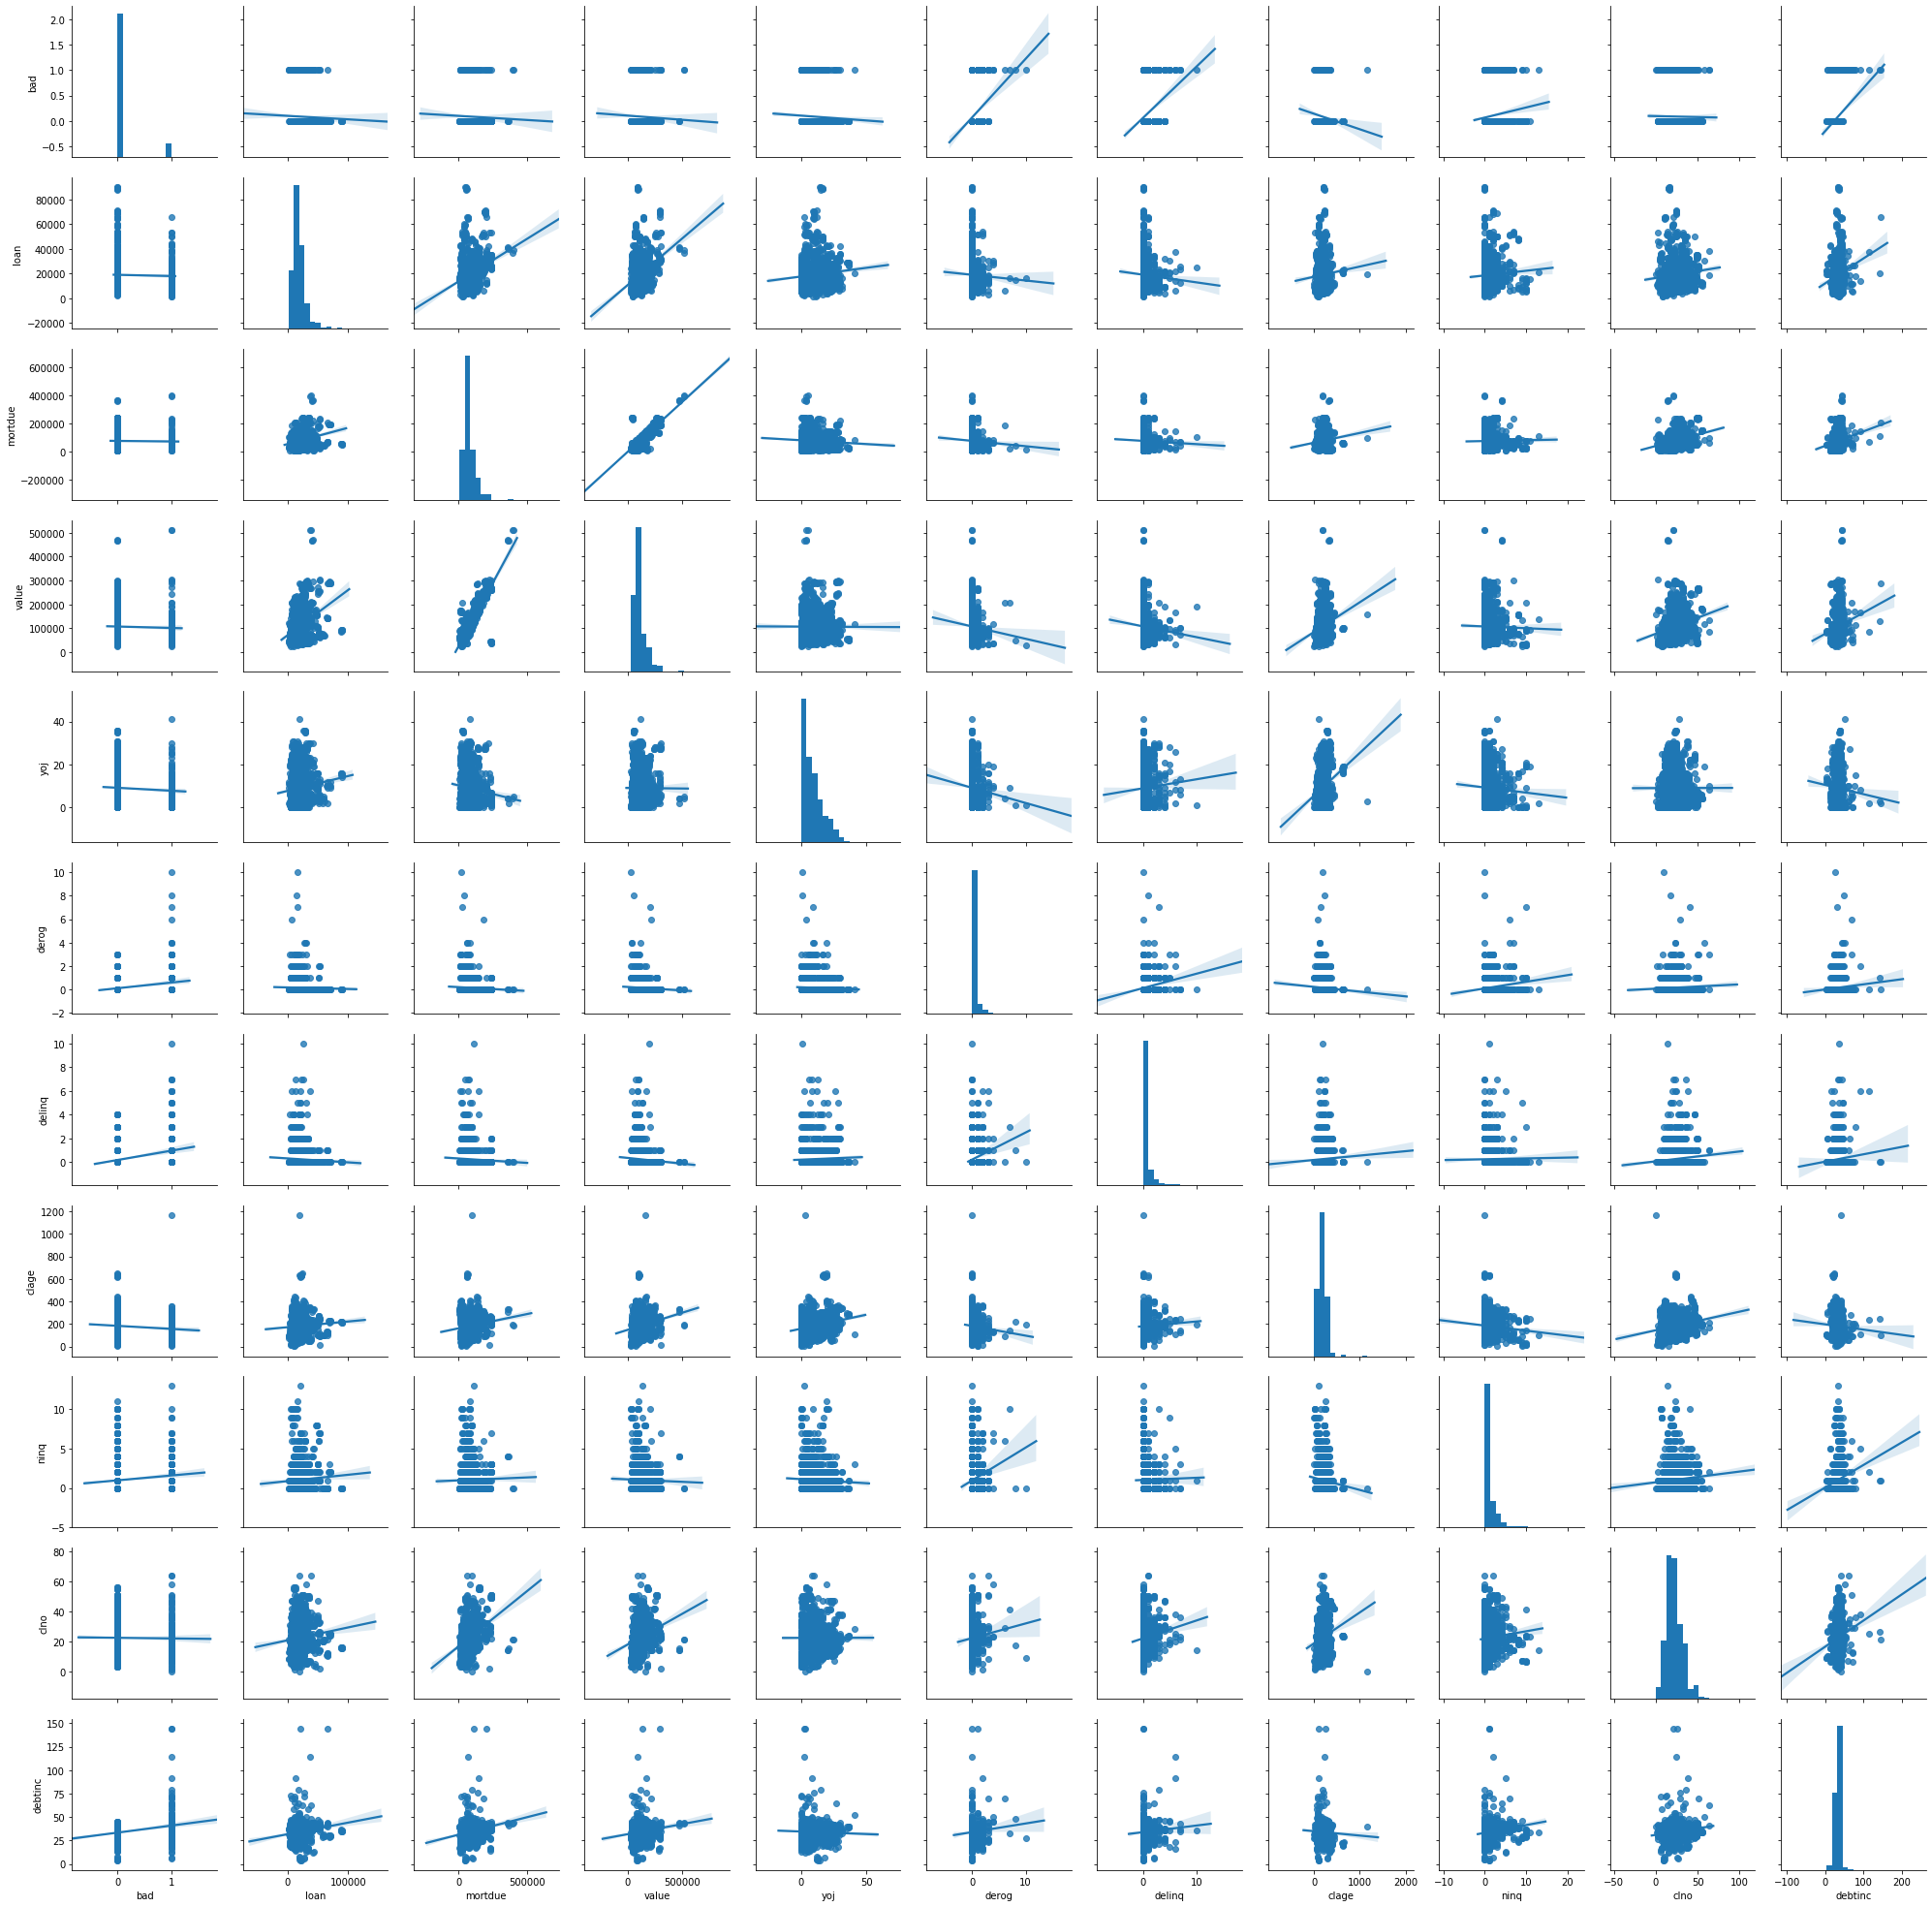

In [5]:
sns.pairplot(df,kind="reg")

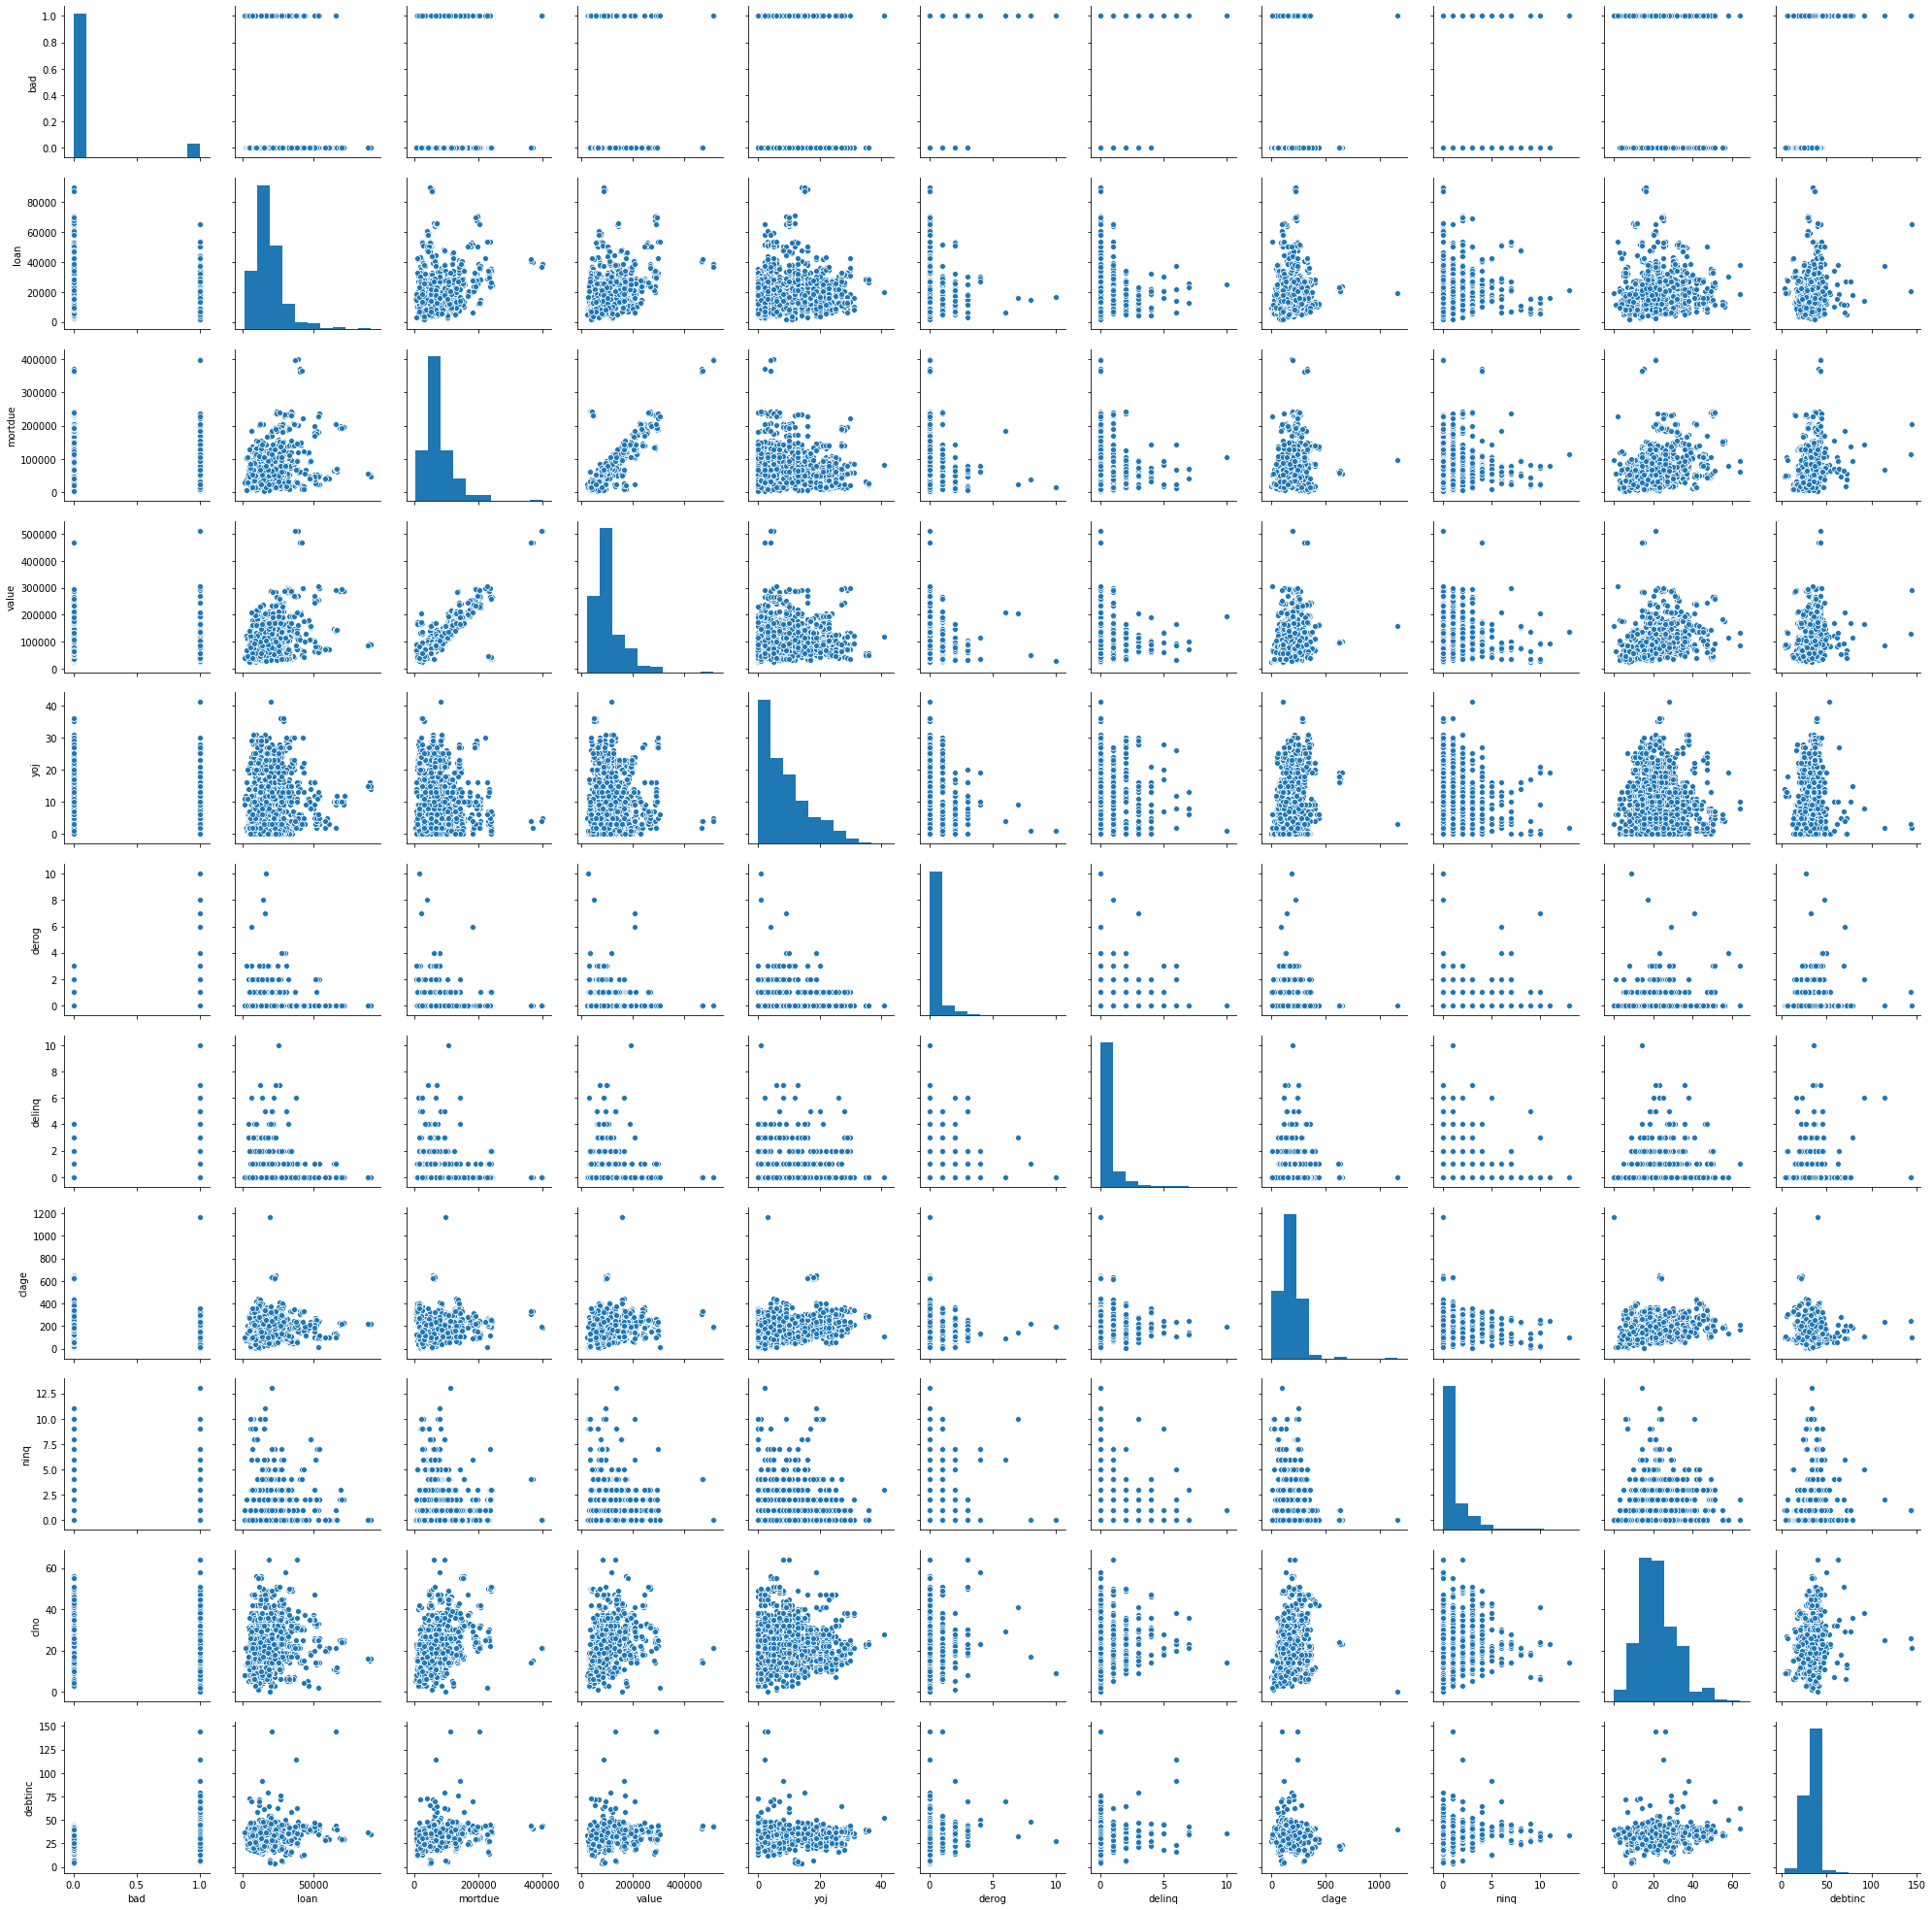

In [6]:
sns.pairplot(df,kind="scatter")

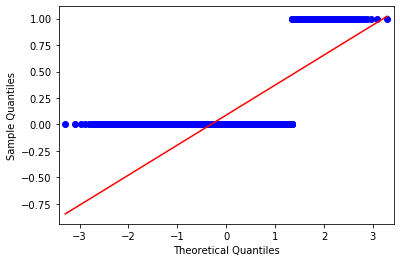

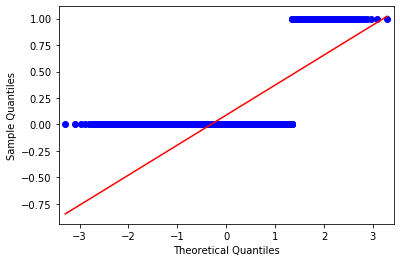

In [7]:
sm.qqplot(df['bad'],line='s')

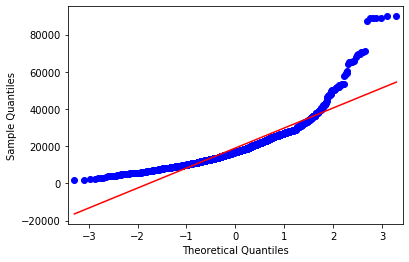

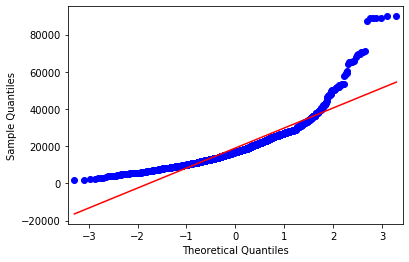

In [8]:
sm.qqplot(df['loan'],line='s')

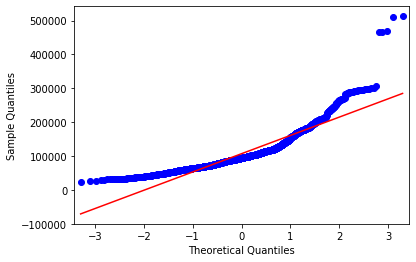

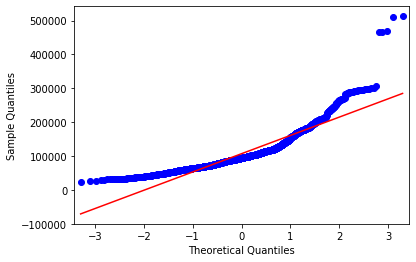

In [9]:
sm.qqplot(df['value'],line='s')

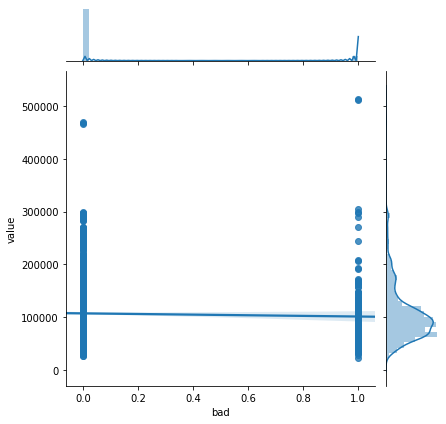

In [10]:
sns.jointplot(x=df['bad'],y=df['value'],kind='reg')

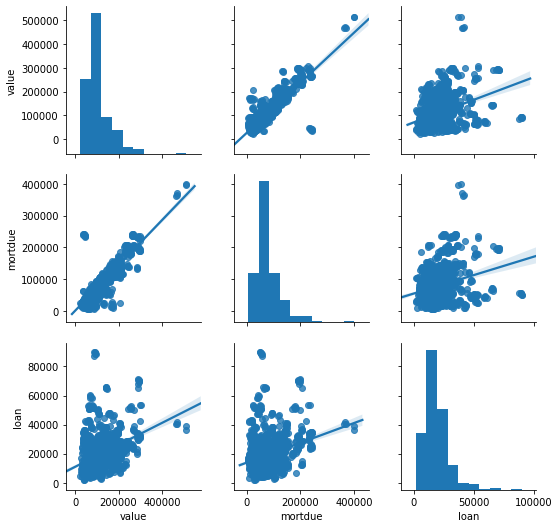

In [11]:
sns.pairplot(df, vars=["value","mortdue","loan"], kind="reg")

In [12]:
new_data=df.drop(columns=["reason", "job"]) #numeric olmayan veriler çıkartıldı
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 11 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2)
memory usage: 269.2 KB


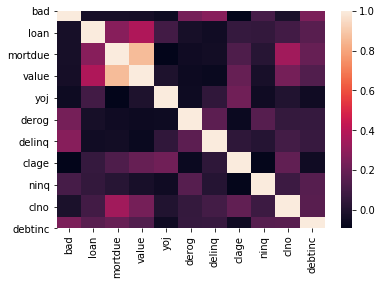

In [13]:
sns.heatmap((new_data).corr())

In [14]:
X=df[['mortdue']]
X[0:5]

,mortdue
153,94727.0
154,79240.0
155,241931.0
156,62989.0
157,25859.0


In [15]:
X = sm.add_constant(X)
X[0:5]

/home/utkuglsvn/PycharmProjects/AnkaraMlBootcamp/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,mortdue
153,1.0,94727.0
154,1.0,79240.0
155,1.0,241931.0
156,1.0,62989.0
157,1.0,25859.0


In [16]:
y = df['loan']
y[0:5]

153    18200
154    21700
155    34100
156     8400
157    17400
Name: loan, dtype: int64

In [17]:
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   loan   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     175.0
Date:                Fri, 20 Sep 2019   Prob (F-statistic):           2.22e-38
Time:                        22:46:12   Log-Likelihood:                -21515.
No. Observations:                2018   AIC:                         4.303e+04
Df Residuals:                    2016   BIC:                         4.304e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.379e+04    456.959     30.169      0.000    1.29e+04    1.47e+04
mortdue        0.0684      0.005     13.231      0.000       0.058       0.079
==============================================================================
Omnibus:                     1106.745   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11030.206
Skew:                           2.403   Prob(JB):                         0.00
Kurtosis:                      13.396   Cond. No.                     1.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
import statsmodels.formula.api as smf
lm = smf.ols("bad ~ loan", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bad   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.383
Date:                Fri, 20 Sep 2019   Prob (F-statistic):              0.240
Time:                        22:46:12   Log-Likelihood:                -319.62
No. Observations:                2018   AIC:                             643.2
Df Residuals:                    2016   BIC:                             654.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1013      0.013      7.908      0.000       0.076       0.126
loan       -6.897e-07   5.86e-07     -1.176      0.240   -1.84e-06     4.6e-07
==============================================================================
Omnibus:                     1165.761   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6302.214
Skew:                           2.901   Prob(JB):                         0.00
Kurtosis:                       9.425   Cond. No.                     4.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model.params

Intercept    1.013181e-01
loan        -6.897299e-07
dtype: float64

In [20]:
model.f_pvalue
print("f_pvalue          :" , "%.4f" % model.f_pvalue)
print("f value           :" , "%.2f" % model.fvalue)
print("Intercept t value :" , "%.2f" % model.tvalues[0:1])
print("loan t value        :" , "%.2f" % model.tvalues[1:2])

f_pvalue          : 0.2397
f value           : 1.38
Intercept t value : 7.91
loan t value        : -1.18


In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()#y=b0+b1*x 
model= reg.fit(X,y)
model.intercept_

13786.099650101987

In [22]:
model.score(X,y)

0.07989168573180827

In [23]:
prediction=model.predict(X)
prediction[0:10]

array([20268.78287971, 19208.9233341 , 30342.75230902, 18096.77911794,
       15555.77150326, 23389.50704444, 18625.10065807, 19220.69422851,
       19134.80776053, 17294.1683637 ])

In [24]:
error_df=prediction-y 
error_df

153      2068.782880
154     -2491.076666
155     -3757.247691
156      9696.779118
157     -1844.228497
            ...     
3544     7656.224511
3546   -23994.470941
3547    -6244.620257
3548   -18806.295373
3549     2244.753399
Name: loan, Length: 2018, dtype: float64

In [25]:
error_arr=error_df.values
error_arr

array([  2068.78287971,  -2491.0766659 ,  -3757.24769098, ...,
        -6244.6202573 , -18806.29537263,   2244.7533986 ])

In [26]:
error_df.var()

106698432.25302751

In [27]:
error_df.abs().mean()

7060.303616334183

In [28]:
#print(" 30 TV reklamına karşılık gelen satış: " + str(float(model.predict([[30]]))))

## Multivariate Regression

In [57]:
df=data.copy() #data kopyalandı
df=data.drop(columns=["reason", "job"]) #numeric olmayan veriler çıkartıldı
df.dropna(inplace=True)# null veriler silindi
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 3549
Data columns (total 11 columns):
bad        2105 non-null int64
loan       2105 non-null int64
mortdue    2105 non-null float64
value      2105 non-null float64
yoj        2105 non-null float64
derog      2105 non-null float64
delinq     2105 non-null float64
clage      2105 non-null float64
ninq       2105 non-null float64
clno       2105 non-null float64
debtinc    2105 non-null float64
dtypes: float64(9), int64(2)
memory usage: 197.3 KB


In [58]:
from sklearn.linear_model import LinearRegression
X=df.iloc[:,[2,3,4]]#2-3-4 degerleri alındı
X.head()

,mortdue,value,yoj
0,18834.0,108355.0,28.0
1,103960.0,127384.0,2.0
2,46865.0,61266.0,5.0
3,57676.0,71027.0,19.0
4,56508.0,78358.0,17.0


In [62]:
y=df.bad.values
mul_linear_regression=LinearRegression()#y=b0+b1*x1+b2*x2
mul_linear_regression.fit(X,y)
print("b0:",mul_linear_regression.intercept_)
print("b1,b2:",mul_linear_regression.coef_)

b0: 0.11984874982636477
b1,b2: [-4.44351317e-08 -1.20911594e-07 -1.94409870e-03]
